8-4 케라스의 SimpleRNN과 LSTM 이해하기

1. 임의의 입력 생성하기

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

In [2]:
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))

(4, 5)


단어 벡터의 차원은 5이고, 문장의 길이가 4인 경우를 가정한 입력이다. \ 
4번의 시점(timesteps)이 존재하고, 각 시점마다 5차원의 단어 벡터가 입력으로 사용된다.\
RNN은 3D 텐서를 받기 때문에, 위의 2D 텐서를 3D 텐서로 변경해야한다.(배치 크기 1을 추가해주므로서 해결)

In [3]:
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


batch_size는 한 번에 RNN이 학습하는 데이터의 양을 의미하지만, 여기서는 샘플이 1개 밖에 없으므로 batch_size는 1이다.

2. SimpleRNN 이해하기

SimpleRNN에는 여러 인자가 있으며 대표적인 인자로 return_sequences와 return_state가 있습니다.(디폴트값은 False)\
우선, 은닉 상태의 크기를 3으로 지정하고, 두 인자 값이 모두 False일 때의 출력값을 보자.

In [4]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False) 와 동일.
hidden_state = rnn(train_X)

print('hidden state : {}, shape : {}'.format(hidden_state, hidden_state.shape))

hidden state : [[-0.3979709  -0.88291705  0.43067637]], shape : (1, 3)


(1,3) 크기의 텐서가 출력되는데, 이는 마지막 시점의 은닉 상태입니다. 은닉 상태의 크기를 3으로 지정했음을 주목하자.\
기본적으로 return_sequences가 False인 경우에는 SimpleRNN은 마지막 시점의 은닉 상태만 출력한다. \
이번에는 return_sequences를 True로 지정하여 모든 시점의 은닉 상태를 출력해보자.

In [5]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)

print('hidden states : {}, shape : {}'.format(hidden_states, hidden_states.shape))

hidden states : [[[ 0.99725026 -0.99904823 -0.98791856]
  [ 0.9967225  -0.9810791  -0.9995403 ]
  [ 0.98373055 -0.84780914 -0.9996451 ]
  [ 0.8244302  -0.6976021  -0.9940955 ]]], shape : (1, 4, 3)


(1,4,3) 크기의 텐서가 출력된다. 앞서 입력 데이터는 (1,4,5)의 크기를 가지는 3D 텐서였고, 그 중 4가 시점(timesteps)에 해당하는 값이므로 모든 시점에 대해서 은닉 상태의 값을 출력하여 (1,4,3) 크기의 텐서를 출력하는 것입니다.\
\
return_state가 True일 경우에는 return_sequences의 True/False 여부와 상관없이 마지막 시점의 은닉 상태를 출력한다.

In [6]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape : {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape : {}'.format(last_state, last_state.shape))

hidden states : [[[0.9952047  0.9727711  0.9889182 ]
  [0.99802047 0.997049   0.9815166 ]
  [0.9881222  0.99366003 0.99327075]
  [0.9976192  0.82836545 0.88789225]]], shape : (1, 4, 3)
last hidden state : [[0.9976192  0.82836545 0.88789225]], shape : (1, 3)


첫번째 출력은 return_sequences = True로 인한 출력으로 모든 시점의 은닉 상태이다. \
두번째 출력은 return_state = True로 인한 출력으로 마지막 시점의 은닉 상태이다.\
따라서 (1,4,3) 텐서의 마지막 벡터값이 return_state = True로 인해 출력된 벡터값과 일치한다.

In [9]:
rnn = SimpleRNN(3, return_sequences = False, return_state = True)
hidden_state, last_state = rnn(train_X)

print('hidden state : {}, shape : {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape : {}'.format(last_state, last_state.shape))

hidden state : [[ 0.998626   -0.97704864 -0.17921217]], shape : (1, 3)
last hidden state : [[ 0.998626   -0.97704864 -0.17921217]], shape : (1, 3)


3. LSTM 이해하기

SimpleRNN이 사용되는 경우는 거의 없다. 이보다는 LSTM이나 GRU을 주로 사용하는데, 이번에는 임의의 입력에 대해서 LSTM을 사용할 경우를 보자.\
(return_sequences = Fasle, return_state = True 인 상태)

In [12]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape : {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape : {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape : {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[ 0.07345077 -0.09812117  0.19927086]
  [ 0.17063655 -0.16476111  0.5251932 ]
  [ 0.14900154 -0.02021803  0.49831757]
  [ 0.37135178  0.04439635  0.4908915 ]]], shape : (1, 4, 3)
last hidden state : [[0.37135178 0.04439635 0.4908915 ]], shape : (1, 3)
last cell state : [[0.5329913  0.27223247 1.1402311 ]], shape : (1, 3)


return_state가 True이므로 두번째 출력값이 마지막 은닉 상태, 세번째 출력값이 마지막 셀 상태인 것은 변함없지만,\
return_sequences가 True이므로 첫번째 출력값은 모든 시점의 은닉 상태가 출력된다.

4. Bidirectional(LSTM) 이해하기

return_sequences가 True인 경우와 False인 경우에 대해서 은닉 상태의 값이 어떻게 바뀌는지 직접 비교하기 위해서\
이번에는 출력되는 은닉 상태의 값을 고정시켜준다.

In [14]:
k_init = tf.keras.initializers.Constant(value=0.1) # kernel_initializer
b_init = tf.keras.initializers.Constant(value=0) # bias_initializer
r_init = tf.keras.initializers.Constant(value=0.1) # recurrent_initializer

return_sequences가 False이고, return_state가 True인 경우이다.

In [15]:
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                           kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape : {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape : {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape : {}'.format(backward_h, backward_h.shape))

hidden states : [[0.6303138 0.6303138 0.6303138 0.7038734 0.7038734 0.7038734]], shape : (1, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape : (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape : (1, 3)


return_state가 True인 경우) \
정방향 LSTM의 은닉 상태(forward_h)와 셀 상태(forward_c) \
역방향 LSTM의 은닉 상태(backward_h)와 셀 상태(backward_c) 4가지를 반환하기 때문이다.\
\
다만, 셀 상태는 각각 forward_c와 backward_c에 저장만 하고 출력하지 않았다.\
첫번째 출력값의 크기가 (1.6)인 것에 주목해보자, 이는 return_sequences가 False인 경우)\
정방향 LSTM의 마지막 시점의 은닉 상태와 역방향 LSTM의 첫번째 시점의 은닉 상태가 연결된 채 반환되기 때문이다.\
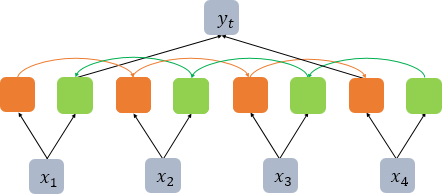\
마찬가지로 return_state가 True인 경우에 반환한 은닉 상태의 값인 forward_h와 backward_h는 각각 정방향 LSTM의 마지막 시점의\
은닉 상태와 역방향 LSTM의 첫번째 시점의 은닉 상태이다. 그리고 이 두값을 연결한 값이 hidden_states에 출력되는 값이다.

- 정방향 LSTM의 마지막 시점의 은닉 상태값 : [0.6303138 0.6303138 0.6303138] 
- 역방향 LSTM의 첫번째 시점의 은닉 상태값 : [0.7038734 0.7038734 0.7038734] \
현재 은닉 상태의 값을 고정시켜두었기 때문에 return_sequences를 True로 할 경우, 출력이 어떻게 바뀌는지 비교 가능하다.

In [16]:
bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                           kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

In [17]:
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.55111325 0.55111325 0.55111325 0.58863586 0.58863586 0.58863586]
  [0.59115744 0.59115744 0.59115744 0.3951699  0.3951699  0.3951699 ]
  [0.6303138  0.6303138  0.6303138  0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


hidden_states의 출력값에서는 이제 모든 시점의 은닉 상태가 출력된다. \
역방향 LSTM의 첫번째 시점의 은닉 상태는 더 이상 정방향 LSTM의 마지막 시점의 은닉 상태와 연결되는것이 아닌,\
정방향 LSTM의 첫번째 시점의 은닉 상태와 연결된다(역방향 LSTM의 첫번째 은닉 , 정방향 LSTM의 첫번째 은닉 연결)\
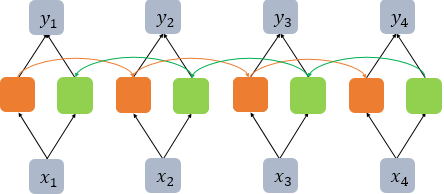

[[0.6303138 0.6303138 0.6303138 0.7038734 0.7038734 0.7038734]] # return_sequences = False 일때,\
앞의 3개는 정방향 LSTM의 마지막 시점의 은닉 상태값, 뒤의 3개는 역방향 LSTM의 첫번째 시점의 은닉 상태값

[[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.55111325 0.55111325 0.55111325 0.58863586 0.58863586 0.58863586]
  [0.59115744 0.59115744 0.59115744 0.3951699  0.3951699  0.3951699 ]
  [0.6303138  0.6303138  0.6303138  0.21942244 0.21942244 0.21942244]]] # return_sequences = True 일때,\
네 번째행 앞의 3개는 정방향 LSTM의 마지막 시점의 은닉 상태값, 첫 번째행 뒤의 3개는 역방향 LSTM의 첫번째 시점의 은닉 상태값\
즉, 은닉 상태들의 연결 조합이 달라짐.